In [1]:
import pandas as pd
import json
import requests
import seaborn as sns
import matplotlib.pyplot as plt



# Specify the data types for the columns
dtypes = {
    'INC NUMBER': 'str',
    'OCCURRED ON': 'str',
    'OCCURRED TO': 'str',
    'UCR CRIME CATEGORY': 'str',
    '100 BLOCK ADDR': 'str',
    'ZIP': 'float',
    'PREMISE TYPE': 'str',
    'GRID': 'str'
}

# Read the CSV file with specified data types
crime_data = pd.read_csv('Resources\Crime-data.csv', dtype=dtypes)

# Drop rows with missing 'ZIP' values
crime_data = crime_data.dropna(subset=['ZIP'])

# Remove decimal points from the 'ZIP' column
crime_data['ZIP'] = crime_data['ZIP'].astype(int)

# Display the dataframe
crime_data.head(10)




,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,GRID
0,201700001603695,11/01/2015 00:00,03/31/2016 00:00,RAPE,38XX W CAMELBACK RD,85019,HOSPITAL,BI20
1,201700001722914,11/01/2015 00:00,NaN,LARCENY-THEFT,279XX N 23RD LN,85085,SINGLE FAMILY HOUSE,FA23
2,201500002168686,11/01/2015 00:00,11/11/2015 09:30,LARCENY-THEFT,14XX E HIGHLAND AVE,85014,PARKING LOT,BI30
3,201600000527709,11/01/2015 00:00,03/22/2016 00:36,LARCENY-THEFT,33XX W CAMELBACK RD,85017,PARKING LOT,BJ21
4,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029,SINGLE FAMILY HOUSE,DA19
5,201500002103724,11/01/2015 00:00,11/01/2015 15:21,DRUG OFFENSE,54XX W INDIAN SCHOOL RD,85031,APARTMENT,BH16
6,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043,SINGLE FAMILY HOUSE,AF12
7,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307,SINGLE FAMILY HOUSE,BJ04
8,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014,APARTMENT,BJ30
9,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006,SINGLE FAMILY HOUSE,BD30


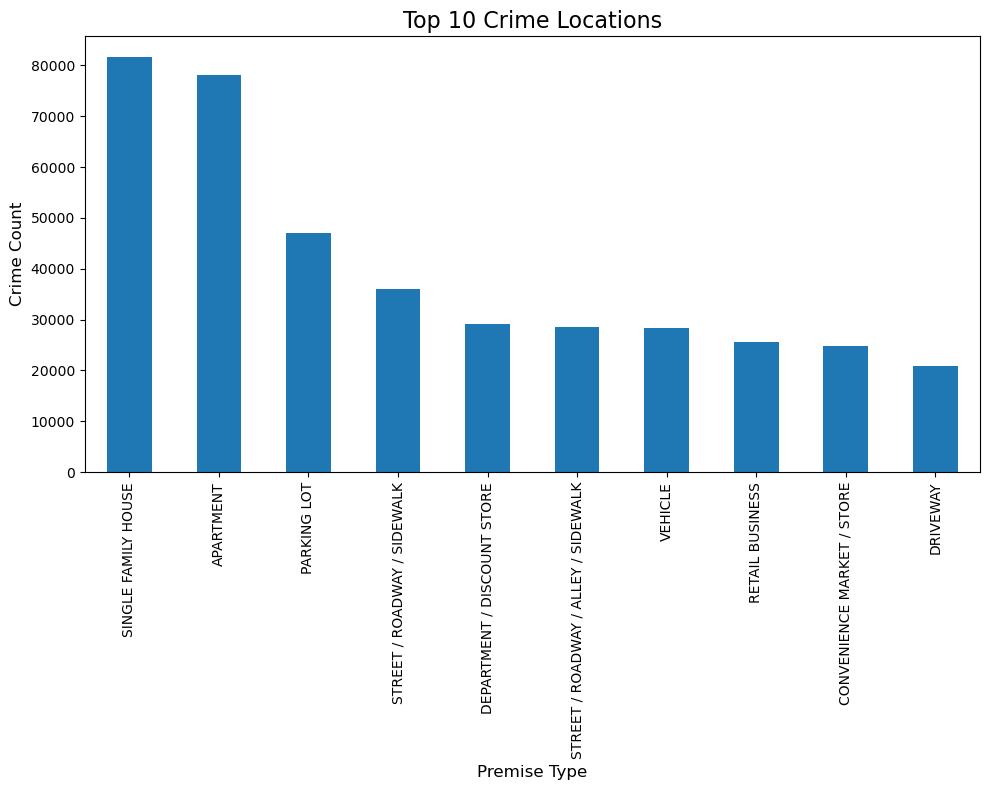

In [21]:
top_locations = crime_data['PREMISE TYPE'].value_counts().head(10)
top_locations.plot(kind='bar', figsize=(10, 8))

plt.title('Top 10 Crime Locations', fontsize=16)
plt.xlabel('Premise Type', fontsize=12)
plt.ylabel('Crime Count', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Resources/image-output/Top_10_location.png')
plt.show()


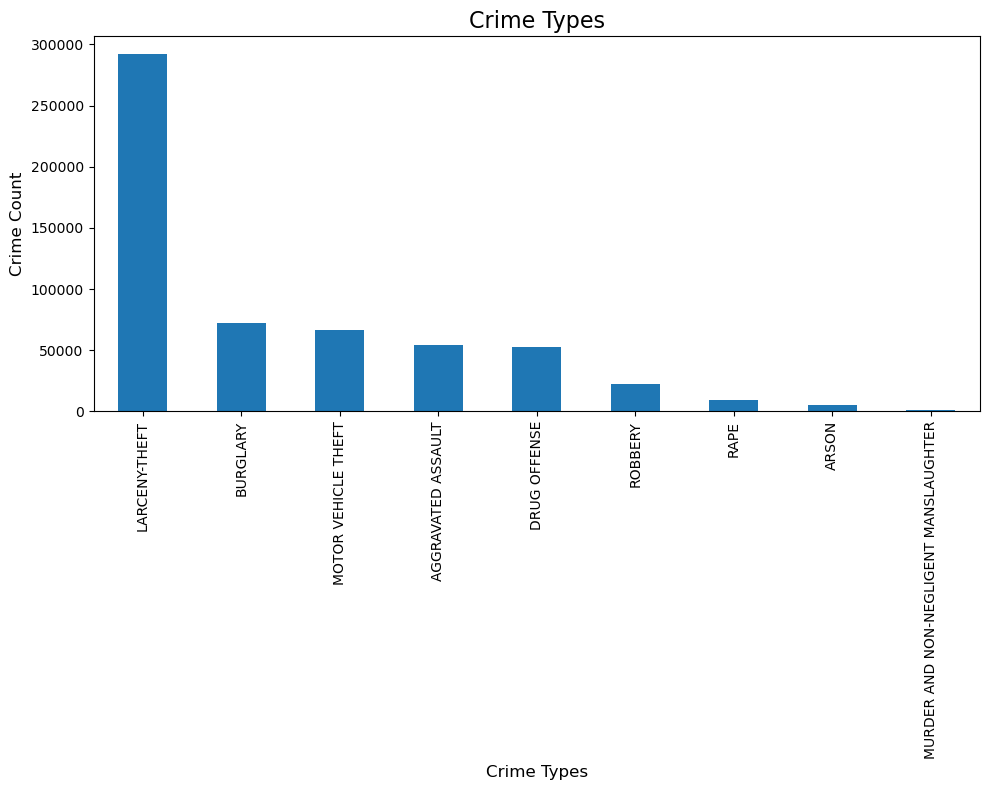

In [20]:
top_crimes = crime_data['UCR CRIME CATEGORY'].value_counts().head(10)
top_crimes.plot(kind='bar', figsize=(10, 8))

plt.title('Crime Types', fontsize=16)
plt.xlabel('Crime Types', fontsize=12)
plt.ylabel('Crime Count', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Resources\image-output\crime_types.png')
plt.show()



In [5]:
top_locations = crime_data['PREMISE TYPE']
top_crimes = crime_data['UCR CRIME CATEGORY']

combined_df = pd.DataFrame({'Top Locations': (top_locations), 'Top Crimes': (top_crimes)})

combined_df

,Top Locations,Top Crimes
0,HOSPITAL,RAPE
1,SINGLE FAMILY HOUSE,LARCENY-THEFT
2,PARKING LOT,LARCENY-THEFT
3,PARKING LOT,LARCENY-THEFT
4,SINGLE FAMILY HOUSE,MOTOR VEHICLE THEFT
...,...,...
575762,FAST FOOD STORE,BURGLARY
575763,STREET / ROADWAY / SIDEWALK,MOTOR VEHICLE THEFT
575764,CONVENIENCE MARKET / STORE,LARCENY-THEFT
575765,SINGLE FAMILY HOUSE,LARCENY-THEFT


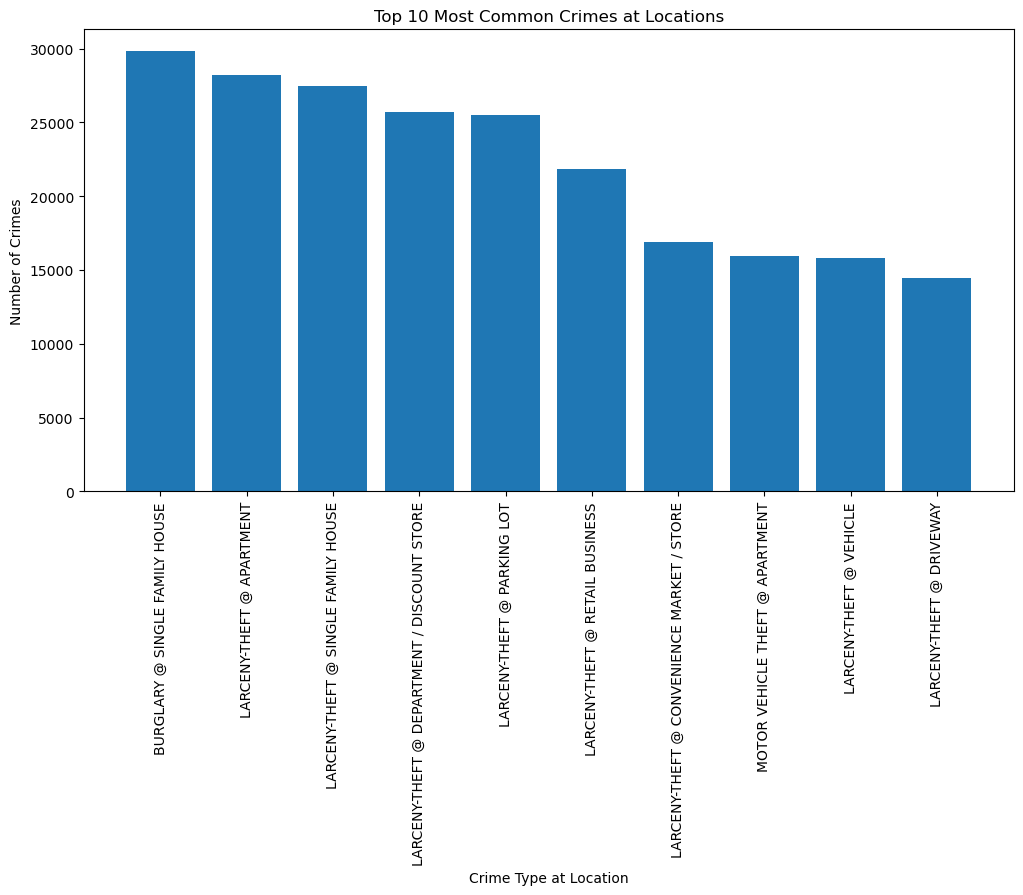

In [19]:
grouped_crime=combined_df.groupby(['Top Locations', 'Top Crimes']).size().reset_index(name='Count')
top_10_crime_location_pairs= grouped_crime.sort_values(by='Count', ascending=False).head(10)
labels = []
for index, row in top_10_crime_location_pairs.iterrows():
    labels.append(f"{row['Top Crimes']} @ {row['Top Locations']}")

plt.figure(figsize=(12, 6))
plt.bar(labels, top_10_crime_location_pairs['Count'])
plt.xlabel("Crime Type at Location")
plt.ylabel("Number of Crimes")
plt.title("Top 10 Most Common Crimes at Locations")
plt.xticks(rotation=90)  
plt.savefig('Resources\image-output\common_location_and_crimes.png')
plt.show()